<h1 align="center">Proyecto: Icfes</h1> 
<h2 align="center">Augusto Rico</h2> 
<h2 align="center">Modulo 1: Análisis y visualización de datos con Python</h2> 
<h2 align="center">Universidad Nacional de Colombia</h2> 

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import geopandas as gpd

In [96]:
def corr(x, y, **kwargs):

    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 10, xycoords = ax.transAxes)

# Descripción del dataset

La base de datos seleccionada es "ICFES Colombia 2018-2021", la cual fue obtenida de Kaggle (https://www.kaggle.com/datasets/sorelyss/icfes-colombia-20182021). Esta base de datos contiene información sobre los resultados y características socioeconómicas de las personas que presentaron el examen Saber 11 durante los años 2018 a 2020. Para nuestro análisis, utilizaremos únicamente los datos del año 2019, incluyendo tanto el examen de inicio como el examen de fin de año.

Además, utilizaremos un dataset con datos georreferenciales para elaborar mapas coropléticos de Colombia de forma extraordinaria.

# Descipcion de las variables

Este dataframe contiene un total de 84 columnas. Sin embargo, utilizaremos únicamente las siguientes columnas:
| Variable | Definición |
| --- | --- |
| SEXO | Sexo del estudiante. |
| EDAD | Edad del estudiante. |
| PERIODO | Periodo en el que se presentó el examen. |
| MUNICIPIO | Municipio donde se encuentra el colegio. |
| DEPARTAMENTO | Departamento donde se encuentra el colegio. |
| ESTRATO | Estrato de la vivienda donde reside el estudiante. |
| INTERNET | Indica si el estudiante tiene acceso a internet en su vivienda. |
| URBANO | Indica si el colegio es rural o urbano. |
| JORNADA_COMPLETA | Tipo de jornada a la que asiste el estudiante. |
| PUNTAJE | Puntaje total obtenido por el estudiante en la prueba Saber 11. |


# Problema
El problema de este trabajo será simular ser parte del Ministerio de Educación Nacional (MEN) y proponer políticas públicas enfocadas en mejorar la educación básica. Para ello, se buscará identificar las áreas de enfoque donde se puedan enfocar los esfuerzos para mejorar la educación y se propondrán políticas específicas para cada área identificada, como van a ser.

* Acceso al internet: una política que se puede proponer es la implementación de programas para garantizar el acceso al internet en todas las escuelas públicas del país. Esto puede lograrse a través de alianzas con empresas de telecomunicaciones o mediante la instalación de infraestructura necesaria para proveer conectividad a Internet en todas las escuelas del país. Además, se pueden considerar programas de capacitación y formación para docentes y estudiantes en el uso de herramientas tecnológicas, como plataformas virtuales y aplicaciones educativas, para mejorar la calidad de la enseñanza.

* Jornada completa: una política que se puede proponer es la ampliación de la jornada escolar para garantizar que los estudiantes tengan suficiente tiempo para recibir una educación de calidad. Esto puede incluir el aumento de horas de clase en materias fundamentales, la inclusión de programas extracurriculares como deportes, música y arte, y la implementación de programas de tutorías y apoyo académico. También se pueden considerar incentivos para docentes que trabajen en jornada completa y capacitaciones para mejorar la calidad de la enseñanza.

# Objetivos
## Objetivo General
* Encontrar que politicas publicas se pueden implementar para mejorar el rendimiento de los estudiantes en las pruebas Saber 11.

## Objetivos Especificos
* Descubrir los factores con mayor impacto sobre la calificacion final del estudiante en las pruebas Saber 11
* Encontrar los sitios del pais donde se concentran las bajas calificaciones en el icfes y comprender que es lo que genera en estos sitios se obtengan bajas calificaciones.
* Identificar los factores socioeconómicos y demográficos que tienen mayor impacto en el rendimiento académico de los estudiantes.
* Evaluar el efecto de la jornada completa y el acceso al internet en el rendimiento académico de los estudiantes.
* Proponer políticas públicas específicas enfocadas en los factores identificados para mejorar el rendimiento académico de los estudiantes en las pruebas Saber 11.

# Hipotesis
Las hipotesis que se quiere resolver son:

* Los factores socioeconómicos, como el acceso a internet y a computadoras, pueden tener un impacto significativo en el rendimiento académico de los estudiantes en las pruebas Saber 11.
* La implementación de jornadas completas de educación puede tener un efecto positivo en los resultados académicos de los estudiantes en las pruebas Saber 11.
* La ubicación geográfica de los colegios, especialmente aquellos ubicados lejos de los centros urbanos principales, puede tener un impacto negativo en el acceso y calidad de la educación, lo que a su vez puede afectar el rendimiento académico de los estudiantes en las pruebas Saber 11.

# Análisis de los datos

## Carga de datos

In [97]:
df =  pd.read_csv('icfes_data.csv',sep='\t'); #icfes
#df que utilizaremos despues.
col_mun = gpd.read_file(r"shapes/Limite Municipal.shp")       # Municipios
col_deps = gpd.read_file(r"shapes/Limite Departamental.shp")  # Departamentos

/tmp/ipykernel_82978/3785016283.py:1: DtypeWarning: Columns (77,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('icfes_data.csv',sep='\t'); #icfes


Para este trabajo, únicamente utilizaremos los datos de los resultados del examen ICFES realizados durante el año 2019 y de estudiantes que residan en Colombia.

In [98]:
df = df[((df['PERIODO'] == 20191) | (df['PERIODO'] == 20194))]
df = df[df['ESTU_PAIS_RESIDE'] == 'COLOMBIA']

Dado que el dataframe contiene 84 columnas, es importante seleccionar las variables de interés y descartar las demás. Nos enfocaremos únicamente en los datos de los estudiantes residentes en Colombia que presentaron las pruebas Saber 11 durante el año 2019.

In [99]:
df=df[['ESTU_GENERO', 'ESTU_FECHANACIMIENTO','PERIODO','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET',
    'COLE_AREA_UBICACION', 'COLE_JORNADA','COLE_MCPIO_UBICACION','COLE_DEPTO_UBICACION','PUNT_GLOBAL']]

Cambiamos el nombre de las columnas para hacerlas más explícitas y fáciles de entender.

In [100]:
df.rename({
    'ESTU_GENERO': 'SEXO',
    'ESTU_FECHANACIMIENTO': 'FECHA_NACIMIENTO',
    'FAMI_ESTRATOVIVIENDA': 'ESTRATO',
    'FAMI_TIENEINTERNET': 'INTERNET',
    'COLE_AREA_UBICACION': 'TIPO_AREA',
    'COLE_JORNADA': 'JORNADA',
    'COLE_MCPIO_UBICACION': 'MUNICIPIO',
    'COLE_DEPTO_UBICACION': 'DEPARTAMENTO',
    'PUNT_GLOBAL': 'PUNTAJE'}
    , axis='columns', inplace=True)

col_mun.rename({'NOMBRE_ENT': 'MUNICIPIO',
                'DEPARTAMEN': 'DEPARTAMENTO'}, axis='columns', inplace=True)

En el dataframe se distingue entre la jornada única y la jornada completa, sin embargo, no existe diferencia alguna entre ambas, por lo que procederemos a cambiar todos los valores "UNICA" por "COMPLETA".

In [101]:
df.replace({'JORNADA': {'UNICA': 'COMPLETA'}}, inplace=True)

Modificamos algunas tildes.

In [102]:
eqtildes = {'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U'}
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].replace(eqtildes, regex=True)
df['MUNICIPIO'] = df['MUNICIPIO'].replace(eqtildes, regex=True)
col_deps['Nombre'] = col_deps['Nombre'].replace(eqtildes, regex=True)
col_mun['MUNICIPIO'] = col_mun['MUNICIPIO'].replace(eqtildes, regex=True)
col_mun['DEPARTAMENTO'] = col_mun['DEPARTAMENTO'].replace(eqtildes, regex=True)

Modificamos algunas columnas para dejarlas listas para su procesamiento.

In [103]:
df['EDAD'] = 2019 - df['FECHA_NACIMIENTO'].str[-4:].astype(int)
del df['FECHA_NACIMIENTO']
df['ESTRATO'].fillna('Sin Estrato', inplace=True) # Se reemplazan los valores nulos por 'Sin Estrato' ya que sus puntajes tienen una distribucion y media similar.
df['INTERNET'].fillna('No', inplace=True) # Se reemplazan los valores nulos por 'No' ya que sus puntajes tienen una distribucion y media similar.

# transformamos la variable Periodo a PS y SS, para facilitar la lectura de los datos. PS: Primer Semestre, SS: Segundo Semestre

df.replace({'PERIODO': {20191: 'PS', 20194: 'SS'}}, inplace=True)

# eliminamos los NaN que quedan.
df.dropna(inplace=True)
# eliminamos los comentarios entre parentesis en col_mun
col_mun['MUNICIPIO'] = col_mun['MUNICIPIO'].replace(r'\(.*\)', '', regex=True).str.strip()

Existen discrepancias en los nombres de algunos departamentos y municipios entre los diferentes dataframes, por lo que procederemos a modificarlos.

In [104]:
col_deps.replace({'Nombre': {'BOGOTA, D.C.': 'BOGOTA',
                            'GUANIA': 'GUAINIA',
                            }}, inplace=True)

df.replace({'DEPARTAMENTO': {'VALLE': 'VALLE DEL CAUCA',
                            'NORTE SANTANDER': 'NORTE DE SANTANDER',
                            'SAN ANDRES': 'SAN ANDRES Y PROVIDENCIA',
                            }}, inplace=True)

In [105]:
df.replace({'MUNICIPIO': {'BARRANCO MINAS': 'BARRANCOMINAS'}}, inplace=True)

col_mun.replace({'MUNICIPIO': {'BARRANCO MINA': 'BARRANCOMINAS',
                                'BECERRILL': 'BECERRIL',
                                'BOGOTA, D.C.': 'BOGOTA D.C.',
                                'BUGA': 'GUADALAJARA DE BUGA',
                                'CARMEN DE VIBORAL': 'EL CARMEN DE VIBORAL',
                                'CHACHAGUI': 'CHACHAGÜI',
                                'DON MATIAS': 'DONMATIAS',
                                'EL TABLON': 'EL TABLON DE GOMEZ',
                                'FUENTE DE ORO': 'FUENTEDEORO',
                                'GUICAN': 'GÜICAN DE LA SIERRA',
                                'HATO NUEVO': 'HATONUEVO',
                                'LOPEZ': 'LOPEZ DE MICAY',
                                'MARIQUITA': 'SAN SEBASTIAN DE MARIQUITA',
                                'MIRITI-PARANA': 'MIRITI - PARANA',
                                'MONTAÑITA': 'LA MONTAÑITA',
                                'PANA-PANA': 'PANA PANA',
                                'PIENDAMO' : 'PIENDAMO - TUNIA',
                                'PIJIÑO  DEL CARMEN': 'PIJIÑO DEL CARMEN',
                                'PISVA': 'PISBA',
                                'PURISIMA': 'PURISIMA DE LA CONCEPCION',
                                'RIOVIEJO': 'RIO VIEJO',
                                'SAN ANDRES Y  PROVIDENCIA': 'PROVIDENCIA Y ST CATALINA',
                                'SAN ANTONIO DE  TEQUENDAMA': 'SAN ANTONIO DEL TEQUENDAMA',
                                'SAN VICENTE': 'SAN VICENTE FERRER',
                                'SANTA CRUZ': 'SANTACRUZ',
                                'SINCE': 'SAN LUIS DE SINCE',
                                'TOLU': 'SANTIAGO DE TOLU',
                                'TOLUVIEJO': 'TOLU VIEJO',
                                'TUMACO': 'SAN ANDRES DE TUMACO',
                                'UBATE': 'VILLA DE SAN DIEGO DE UBATE',
                                'VILLA DE LEIVA': 'VILLA DE LEYVA'}}, inplace=True)

corrections = {
    ('SAN ANDRES Y PROVIDENCIA', 'PROVIDENCIA'): 'PROVIDENCIA Y ST CATALINA',
    ('CHOCO', 'EL CARMEN'): 'EL CARMEN DE ATRATO',
    ('SANTANDER', 'EL CARMEN'): 'EL CARMEN DE CHUCURI',
    ('ANTIOQUIA', 'SANTUARIO'): 'EL SANTUARIO',
    ('ANTIOQUIA', 'SAN PEDRO'): 'SAN PEDRO DE LOS MILAGROS',
    ('ANTIOQUIA', 'SAN ANDRES'): 'SAN ANDRES DE CUERQUIA',
    ('SANTANDER', 'SAN ANDRES'): 'SAN ANDRES-SANTANDER',
    ('ATLANTICO', 'PUERTO COLOMBIA'): 'PUERTO COLOMBIA-ATLANTICO',
    ('GUAINIA', 'PUERTO COLOMBIA'): 'PUERTO COLOMBIA-GUAINIA'
}

for (depto, municipio), new_municipio in corrections.items():
    df.loc[(df['DEPARTAMENTO'] == depto) & (df['MUNICIPIO'] == municipio), 'MUNICIPIO'] = new_municipio
    col_mun.loc[(col_mun['DEPARTAMENTO'] == depto) & (col_mun['MUNICIPIO'] == municipio), 'MUNICIPIO'] = new_municipio


Algunos municipios existen en distintos departamentos por lo que procederemos a dejar esos municipios como unicos para que en el futuro no nos generen problemas

In [106]:
x=df.groupby('MUNICIPIO')['DEPARTAMENTO'].unique().reset_index()
x=x[x['DEPARTAMENTO'].apply(lambda x: len(x))>1] # muestra unicamente los municipios con nombres comunes en distintos departamentos.
x

for i in x.index:
    for j in x['DEPARTAMENTO'][i]:
        new_name = x['MUNICIPIO'][i] + '-' + j
        df.loc[(df['MUNICIPIO'] == x['MUNICIPIO'][i]) & (df['DEPARTAMENTO'] == j), 'MUNICIPIO'] = new_name
        col_mun.loc[(col_mun['MUNICIPIO'] == x['MUNICIPIO'][i]) & (col_mun['DEPARTAMENTO'] == j), 'MUNICIPIO'] = new_name

Transformamos algunas columnas en dummies y valores numéricos para facilitar su procesamiento en una regresión.

In [107]:
df['INTERNET'] = df['INTERNET'].map({'Si': 1, 'No': 0})
df['URBANO'] = df['TIPO_AREA'].map({'URBANO': 1, 'RURAL': 0})
df['ESTRATO'] = df['ESTRATO'].map({'Sin Estrato': 0, 'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6})
df['JORNADA_COMPLETA'] = np.where(df['JORNADA'] == 'COMPLETA', 1, 0)

del df['TIPO_AREA']
del df['JORNADA']


Reorganizamos las columnas para presentarlas de una forma más clara y legible.

In [108]:
df = df[['SEXO', 'PERIODO', 'EDAD', 'DEPARTAMENTO', 'MUNICIPIO', 'ESTRATO', 'URBANO', 'JORNADA_COMPLETA', 'INTERNET', 'PUNTAJE']]

Guardamos el nuevo dataframe para poder utilizarlo en lugar del anterior, ya que el anterior tiene un tamaño de 1.3GB.

In [109]:
#save df to csv without index
pd.DataFrame.to_csv(df, 'icfes_data_clean.csv', sep='\t', index=False)

In [110]:
df=pd.read_csv('icfes_data_clean.csv',sep='\t')
df.head()

,SEXO,PERIODO,EDAD,DEPARTAMENTO,MUNICIPIO,ESTRATO,URBANO,JORNADA_COMPLETA,INTERNET,PUNTAJE
0,M,SS,17,MAGDALENA,SANTA ANA,3,1,0,1,208
1,F,SS,16,SANTANDER,BUCARAMANGA,0,1,0,0,280
2,M,SS,16,BOGOTA,BOGOTA D.C.,3,1,1,1,299
3,M,SS,18,BOLIVAR,CARTAGENA DE INDIAS,1,1,0,0,299
4,M,SS,17,BOGOTA,BOGOTA D.C.,3,1,0,0,309


# Procesamiento de Datos.

# Analisis Descriptivo

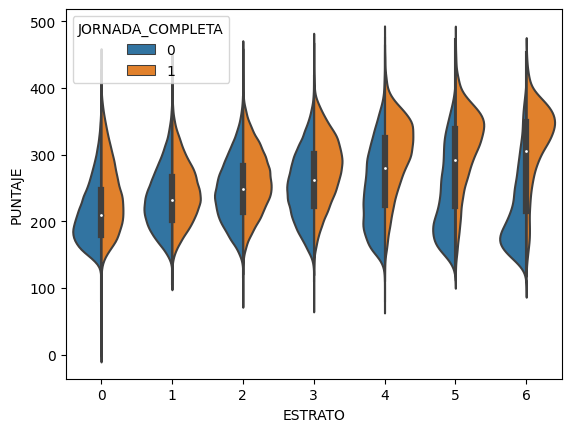

In [111]:
sns.violinplot(x='ESTRATO', y='PUNTAJE',hue='JORNADA_COMPLETA', split=True,data=df);

Se observa que el estrato es un factor determinante en el puntaje obtenido en las pruebas Saber 11, lo cual se puede explicar debido a que aquellos con mayores ingresos pueden acceder a una educación privada de mayor calidad, así como a profesores particulares y otros cursos de refuerzo para el aprendizaje del estudiante, lo que resulta en una mayor puntuación en las pruebas.

Otro factor que se puede identificar fácilmente es que, independientemente del estrato, los puntajes tienen una distribución más sesgada hacia notas más altas cuando los estudiantes asisten a una jornada completa en lugar de una jornada única en el colegio.

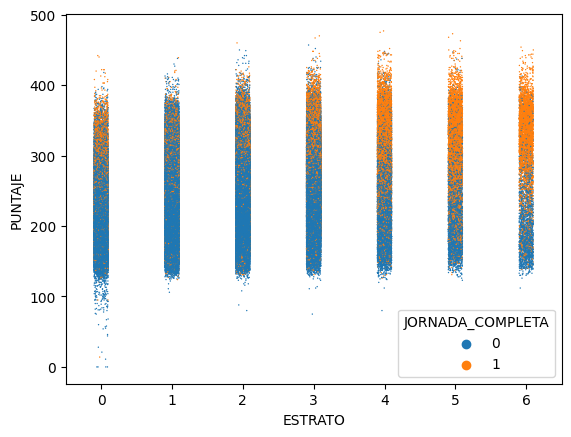

In [112]:
sns.stripplot(x='ESTRATO', y='PUNTAJE',hue='JORNADA_COMPLETA',size=1,data=df);

Realizaremos una prueba Z para verificar si la diferencia de las medias de los puntajes de los estudiantes con y sin Jornada Completa es significativa.

In [113]:
sm.stats.ztest(df[df['JORNADA_COMPLETA']==1]['PUNTAJE'],
               df[df['JORNADA_COMPLETA']==0]['PUNTAJE'],
               value=0, alternative='two-sided')

(198.7175530864623, 0.0)

Como el valor de p es igual a 0.0, podemos rechazar $H_0$ y por lo tanto afirmar que la diferencia de puntajes entre personas con y sin Jornada Completa es significativa.

Se evidencia de mejor forma que los estudiantes con jornada completa, sin importar el estrato, en general obtienen mejores notas en las pruebas Saber 11. Por lo tanto, se podría proponer como política de educación la transformación de los colegios a jornada completa, para que los estudiantes obtengan una mejor formación.

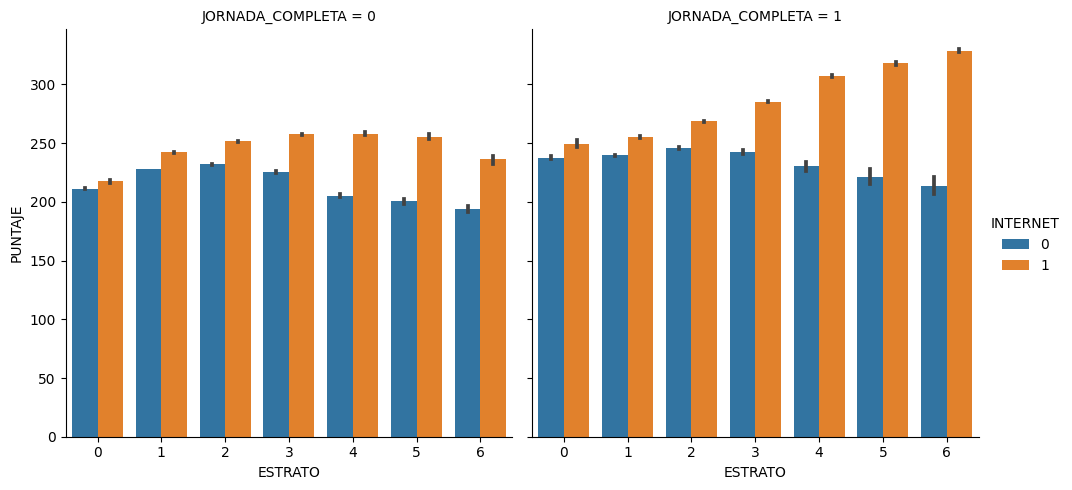

In [114]:
sns.catplot(x='ESTRATO', y='PUNTAJE',col='JORNADA_COMPLETA',hue='INTERNET',kind='bar',data=df);

 No obstante, si comparamos los resultados internos con la capacidad del estudiante de conectarse a internet, vemos que en general, el acceso a internet es un determinante importante de su puntaje final. En todos los estratos y sin importar la jornada, las personas sin conexión a internet en el hogar tienen calificaciones considerablemente inferiores a las que sí tienen esta capacidad

Realizaremos una prueba Z para verificar si la diferencia de las medias de los puntajes de los estudiantes con acceso a internet en el hogar y los que no lo tienen es significativa.

In [115]:
sm.stats.ztest(df[df['INTERNET']==1]['PUNTAJE'],
               df[df['INTERNET']==0]['PUNTAJE'],
               value=0, alternative='two-sided')

(243.80546044502347, 0.0)

Como el valor P es igual a 0.0, podemos rechazar la hipótesis nula $H_0$ y, por lo tanto, afirmar que la diferencia en los puntajes entre personas con y sin acceso a internet es significativa

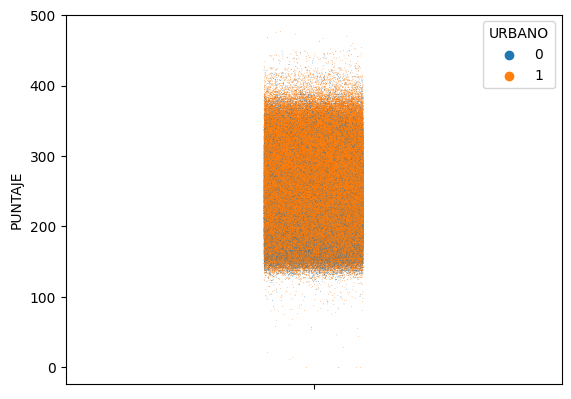

In [116]:
sns.stripplot(hue='URBANO', y='PUNTAJE', size=0.5,data=df);

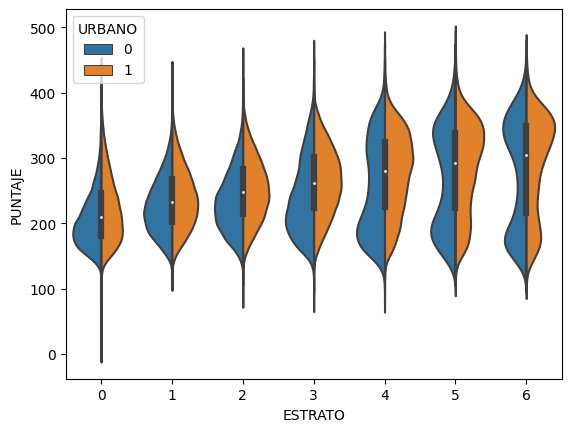

In [117]:
sns.violinplot(x='ESTRATO', y='PUNTAJE',hue='URBANO',split=True,data=df);

Vemos que hay poca diferencia entre las calificaciones de estudiantes urbanos y rurales. Sin embargo, realizaremos un test de diferencia de medias para confirmar que estas medias son estadísticamente iguales.

In [118]:
print(df[df['URBANO']==1]['PUNTAJE'].mean())
print(df[df['URBANO']==0]['PUNTAJE'].mean())

250.9332329254262
228.71581466917422


In [119]:
sm.stats.ztest(df[df['URBANO']==1]['PUNTAJE'],
               df[df['URBANO']==0]['PUNTAJE'],
               value=0, alternative='two-sided')

(116.75761689645078, 0.0)

a pesar de lo esperado por la verificación visual, obtenemos un P-Value de 0.0, por lo que realmente la ubicación del estudiante en una ciudad es un factor determinante en su rendimiento académico.

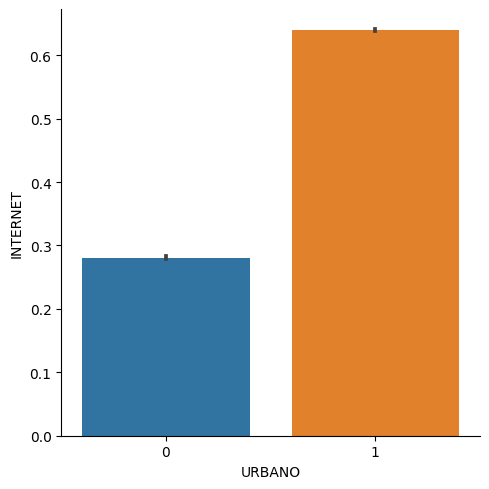

In [120]:
sns.catplot(x='URBANO', y='INTERNET',kind='bar',data=df);

Esta diferencia de medias puede deberse a que las personas que estudian en entornos urbanos tienen una mayor probabilidad de tener acceso a internet en comparación con las personas en entornos rurales, como se muestra en la gráfica anterior. Por lo tanto, aunque hay una diferencia en las medias, se debe a que la variable URBANO es un determinante importante en otra característica de alto impacto.

# Análisis Inferencial
Dado que todas las variables tienen algún tipo de significación en el puntaje, o al menos en la media, procederemos a realizar una regresión lineal para comprender de manera agregada la importancia de cada una de estas características y cómo impactan realmente en la calificación final de las pruebas Saber 11 de cada estudiante.

Sin embargo, como variables como el sexo o el estrato no pueden ser modificadas por parte del Estado como una política pública, no serán consideradas en esta regresión. Solo se tomarán en cuenta como determinantes en esta regresión si el alumno asiste a un colegio de jornada completa y si tiene acceso a internet.

In [121]:
model = sm.OLS.from_formula("PUNTAJE ~ JORNADA_COMPLETA + INTERNET", 
                            data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PUNTAJE   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                 4.760e+04
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:21:15   Log-Likelihood:            -2.9990e+06
No. Observations:              565785   AIC:                         5.998e+06
Df Residuals:                  565782   BIC:                         5.998e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          222.4357      0.105   2113.988      0.000     222.229     222.642
JORNADA_COMPLETA    25.6873      0.143    179.892      0.000      25.407      25.967
INTERNET            30.0585      0.132    228.207      0.000      29.800      30.317
==============================================================================
Omnibus:                     8413.195   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6959.492
Skew:                           0.204   Prob(JB):                         0.00
Kurtosis:                       2.642   Cond. No.                         2.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En la regresión realizada se ha identificado que tanto la jornada completa como el acceso a Internet son determinantes significativos del puntaje obtenido en las pruebas Saber 11. Sin embargo, al comparar el impacto que tendría cada política pública en el puntaje promedio de los estudiantes, se ha encontrado que la política de proveer acceso a internet tendría un impacto mayor que la política de jornada completa.

Esto se debe a que, en promedio, los estudiantes que tienen acceso a internet obtienen mejores resultados en las pruebas Saber 11, independientemente de su estrato y de si asisten a una jornada completa. En cambio, aunque la jornada completa también tiene un impacto positivo en el puntaje promedio, este impacto no es tan significativo como el del acceso a internet.

Es importante tener en cuenta que esta conclusión se basa en los resultados obtenidos en la muestra analizada y puede variar en diferentes contextos y poblaciones. Sin embargo, en el contexto de esta muestra en particular, se concluye que, si los recursos del estado son limitados, una política pública que priorice el acceso a internet para los estudiantes tendría un mayor impacto en el mejoramiento de los puntajes obtenidos en las pruebas Saber 11.

# Analisis Espacial

# Analisis Departamental

In [122]:
depto_df = df.groupby('DEPARTAMENTO')[['PUNTAJE','INTERNET','JORNADA_COMPLETA']].mean()

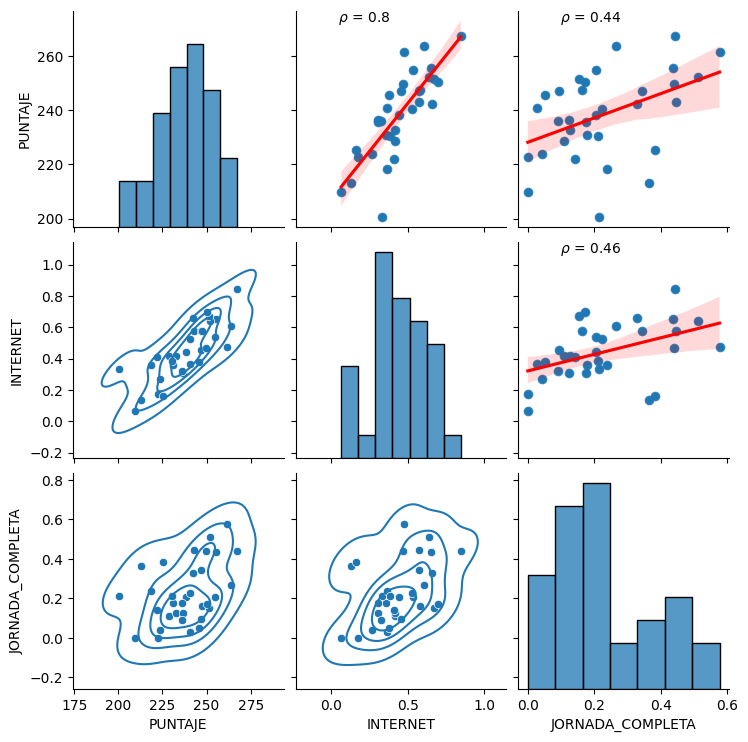

In [123]:
p1 = sns.pairplot(depto_df);
p1.map_lower(sns.kdeplot,levels=5);
p1.map_upper(sns.regplot, line_kws={'color':'red'});
p1.map_upper(corr);

En la grafica se puede observar que el coeficiente de la variable de acceso a internet es mayor que el coeficiente de la variable de jornada completa. Esto significa que el acceso a internet tiene un impacto mayor en las calificaciones de los estudiantes que la jornada completa.

Además, al analizar las distribuciones de las calificaciones en los departamentos donde la mayoría de los estudiantes tienen acceso a internet y los que no, se puede ver una clara diferencia. En los departamentos donde la mayoría de los estudiantes tienen acceso a internet, la distribución de las calificaciones es más sesgada hacia las calificaciones altas, mientras que en los departamentos donde la mayoría de los estudiantes no tienen acceso a internet, la distribución es más sesgada hacia las calificaciones bajas.

Esto sugiere que el acceso a internet es un factor determinante en el rendimiento académico de los estudiantes, y que proporcionar acceso a internet a los estudiantes podría ser una política pública más efectiva para mejorar el rendimiento académico que la implementación de la jornada completa.

Es importante tener en cuenta que aunque la jornada completa no tenga un impacto tan fuerte como el acceso a internet en el rendimiento académico, sigue siendo una variable importante a considerar en la educación pública. La jornada completa puede proporcionar un ambiente de aprendizaje más estructurado y permitir más tiempo para el aprendizaje, lo que podría tener un impacto positivo en el rendimiento académico de los estudiantes. Sin embargo, si se presenta un dilema monetario, la política pública debería priorizar el acceso a internet, ya que esta opción tendría un impacto mayor en las calificaciones de los estudiantes.

In [124]:
depto_df = col_deps.merge(depto_df, left_on='Nombre', right_on='DEPARTAMENTO')

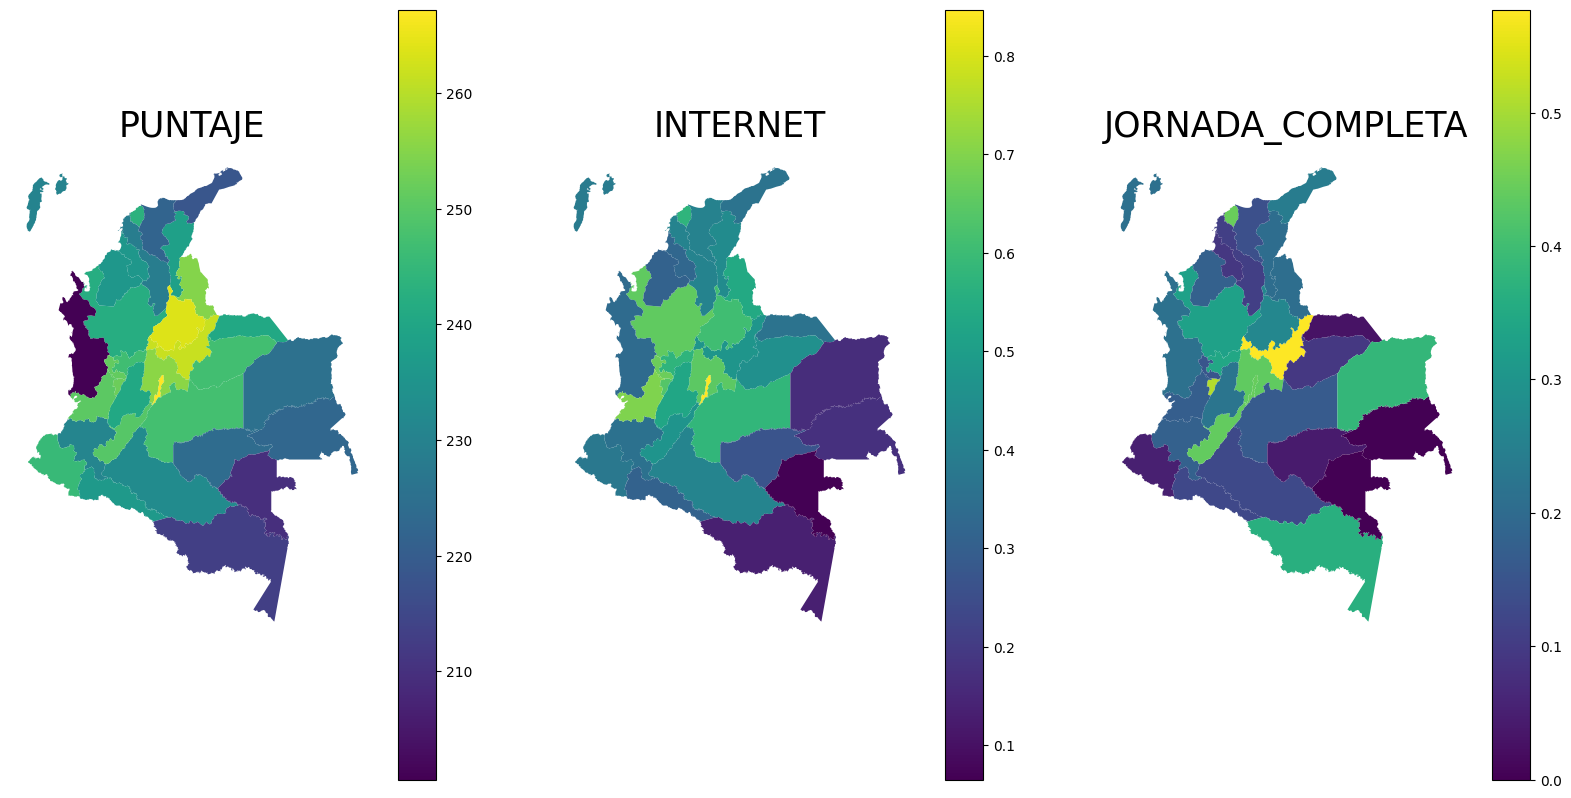

In [125]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

for i in range(3):
    
    columns = ['PUNTAJE', 'INTERNET', 'JORNADA_COMPLETA']
    
    depto_df.plot(column=columns[i], cmap='viridis', ax=ax[i], legend=True)
    ax[i].set_axis_off()
    ax[i].set_title(columns[i], fontdict={'fontsize': '25', 'fontweight' : '3'})
    
plt.show()

En los mapas se puede observar que la jornada completa puede no tener un impacto significativo en el rendimiento académico en todos los departamentos, como se puede ver en el caso de departamentos como Amazonas o Vichada, donde hay un porcentaje aceptable de estudiantes en jornada completa, pero esto no se traduce en mejores notas en comparación con otros departamentos. Por ejemplo, el departamento de Santander tiene uno de los puntajes más altos a pesar de tener un bajo porcentaje de estudiantes en jornada completa, lo que podría explicarse por una tasa de conectividad más alta en comparación con los municipios con tasas de conectividad deficientes en los otros departamentos mencionados. Por lo tanto, se puede decir que la conectividad a internet parece ser un factor más importante en el rendimiento académico que la jornada completa, y esto debe ser considerado al formular políticas públicas educativas para mejorar el rendimiento académico de los estudiantes.

# Analisis Municipal

In [126]:
mncp_df = df.groupby('MUNICIPIO')[['PUNTAJE','INTERNET','JORNADA_COMPLETA']].mean()

In [127]:
mncp_df['N'] = df.groupby('MUNICIPIO')['PUNTAJE'].count()

filtramos los municipios con menos de 100 estudiantes para evitar municipios con datos completamente atipicos y asegurar una muestra estadisticamente significativa.

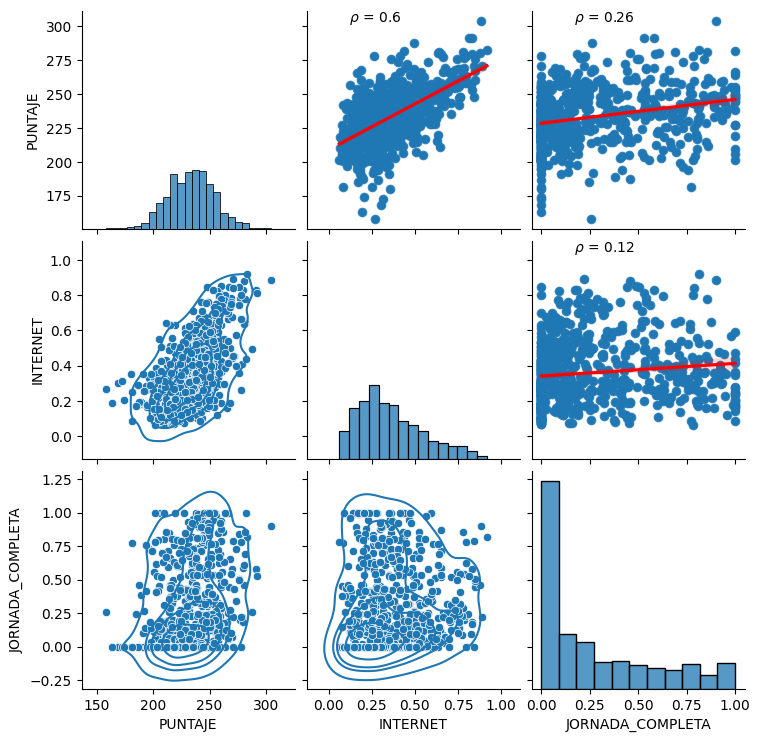

In [128]:
p2 = sns.pairplot(mncp_df[mncp_df['N']>100].iloc[:, :-1]);
p2.map_lower(sns.kdeplot,levels=5);
p2.map_upper(sns.regplot, line_kws={'color':'red'});
p2.map_upper(corr);

Aquí se puede observar que la relación entre la jornada completa y el puntaje promedio de los estudiantes es bastante débil y poco significativa, mientras que la conectividad a internet sigue siendo un factor clave para determinar el rendimiento académico de los estudiantes en los diferentes municipios.

Aunque algunos municipios con baja conectividad tienen puntajes promedio relativamente altos, esto no necesariamente indica que la falta de conectividad no tenga un impacto negativo en el rendimiento académico de los estudiantes en general.

Por otro lado, se puede observar que la correlación entre la jornada completa y el puntaje promedio de los estudiantes es aún más débil sin el filtro de 100 personas, lo que refuerza la idea de que la jornada completa puede no ser una política pública eficaz para mejorar el rendimiento académico de los estudiantes en general.

En resumen, estos análisis sugieren que la conectividad a internet puede ser una política pública más efectiva para mejorar el rendimiento académico de los estudiantes que la jornada completa, lo que podría ayudar a orientar las decisiones de inversión y las políticas públicas relacionadas con la educación en el futuro.

In [129]:
mncp_df = col_mun.merge(mncp_df, left_on='MUNICIPIO', right_on='MUNICIPIO')

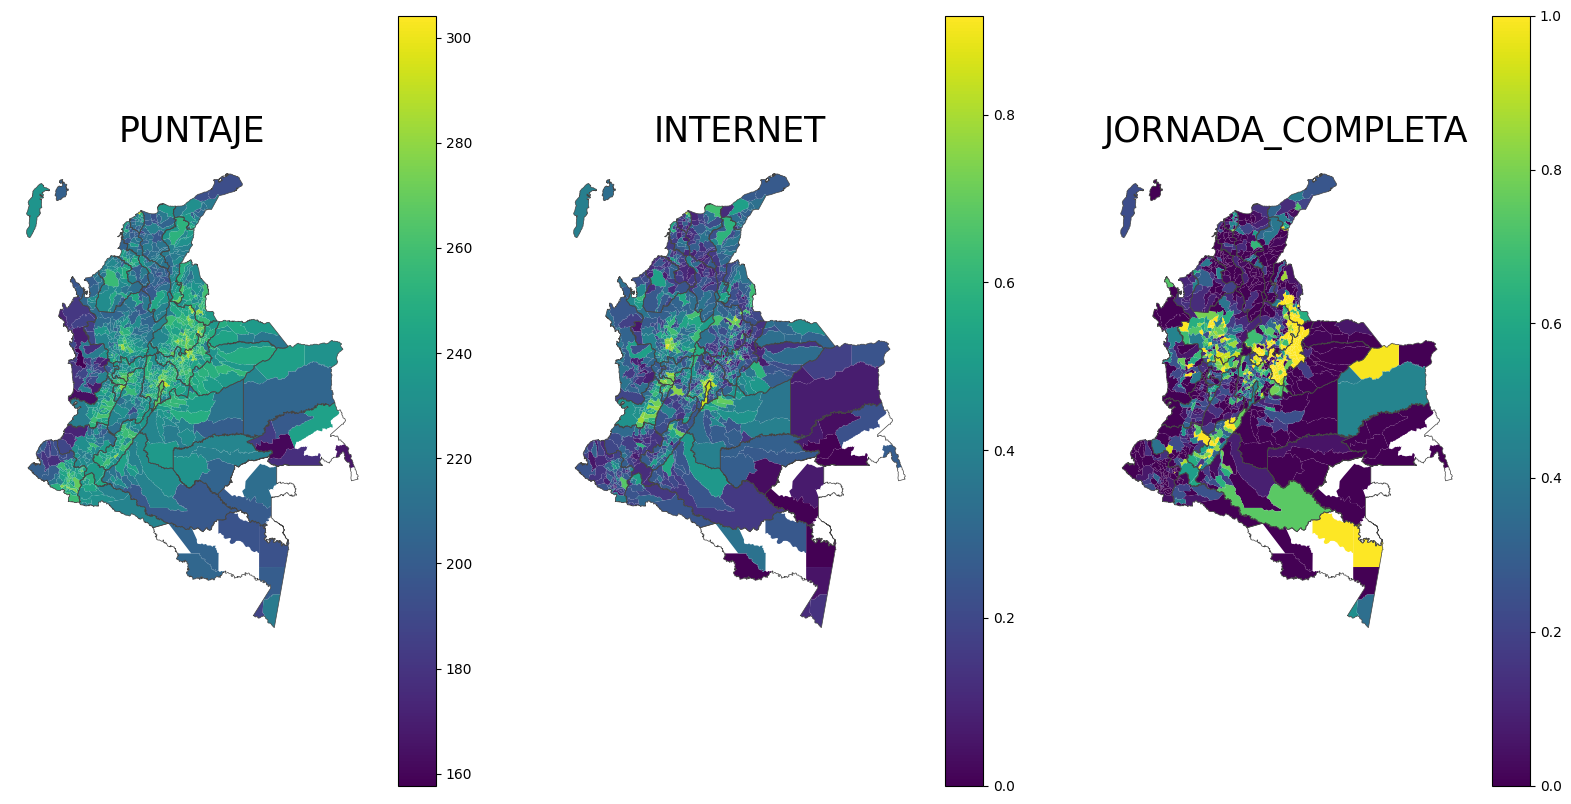

In [130]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

for i in range(3):
    
    columns = ['PUNTAJE', 'INTERNET', 'JORNADA_COMPLETA']
    
    mncp_df.plot(column=columns[i], cmap='viridis', ax=ax[i], legend=True)
    ax[i].set_axis_off()
    ax[i].set_title(columns[i], fontdict={'fontsize': '25', 'fontweight' : '3'})
    
    col_deps.geometry.boundary.plot(linewidth=0.5, 
                                color=None,
                                edgecolor='#444444',
                                ax=ax[i]);
    
plt.show()

Se puede observar de manera detallada por municipios que aquellos con una mejor conectividad a Internet, como la región central, presentan calificaciones considerablemente superiores en comparación con aquellas zonas con mala conectividad pero con alta proporción de estudiantes en jornada completa, como es el caso de la zona del sur del país. Esto resalta aún más la importancia del acceso a Internet como un factor fundamental en el rendimiento académico de los estudiantes. Incluso en municipios con una baja proporción de estudiantes en jornada completa, aquellos con mejor conectividad a Internet logran obtener calificaciones promedio más altas en comparación con aquellos con peor conectividad y mayor proporción de estudiantes en jornada completa.